In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep="\t") 

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.shape

(2240, 29)

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
df=df.drop_duplicates(keep=False, inplace=False)

In [14]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

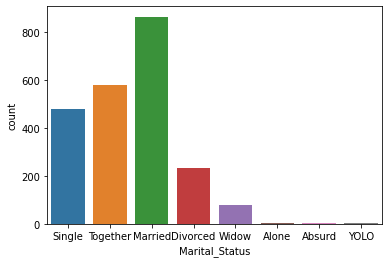

In [15]:
import seaborn as sns
sns.countplot(df.Marital_Status,data=df)

<AxesSubplot:xlabel='Income', ylabel='Density'>

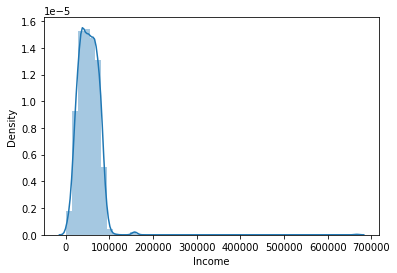

In [16]:
sns.distplot(df.Income)

In [17]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [18]:
# for my analysis I care if you are In Relationship or single so i will change Marital_Status to these status
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"In Relationship", "Together":"In Relationship",
                                                   "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single","Alone":"Single"})

df["Marital_Status"].value_counts()

In Relationship    1444
Single              796
Name: Marital_Status, dtype: int64

In [19]:
#Calculate total spending amount for each customer 
df["TotalSpent"]=df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntFruits']+df['MntWines']

In [20]:
df["TotalSpent"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: TotalSpent, Length: 2240, dtype: int64

In [21]:
#adding column for having children or not in general,either they are kids or teens
df["TotalChildren"]=df['Kidhome']+df['Teenhome']
df["TotalChildren"]


0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: TotalChildren, Length: 2240, dtype: int64

In [22]:

#df["Children"] = df["TotalChildren"].apply(lambda x: 'NO-Children' if x == 0 else 'Children')
df['Childeren'] = df['TotalChildren'].apply(lambda x:'NO-Children' if x==0 else 'Children')

In [23]:
df['Childeren']

0       NO-Children
1          Children
2       NO-Children
3          Children
4          Children
           ...     
2235       Children
2236       Children
2237    NO-Children
2238       Children
2239       Children
Name: Childeren, Length: 2240, dtype: object

In [24]:
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']].value_counts()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4
0             0             0             0               1836
                            1             0                135
                            0             1                108
1             0             0             0                 73
                                          1                 37
                            1             0                 21
0             1             0             1                 12
1             1             0             1                 10
0             1             1             0                  4
1             1             1             0                  3
0             1             0             0                  1
dtype: int64

In [25]:
#calculating how many time the customer accepted our advertising campaign
df["Total_cmp_acceptance"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [26]:
df["Total_cmp_acceptance"]

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Total_cmp_acceptance, Length: 2240, dtype: int64

In [27]:
# calculating age because it is more useful than year of birth 
df["Age"]=2014-df['Year_Birth']

In [28]:
df['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

<AxesSubplot:xlabel='Year_Birth', ylabel='Density'>

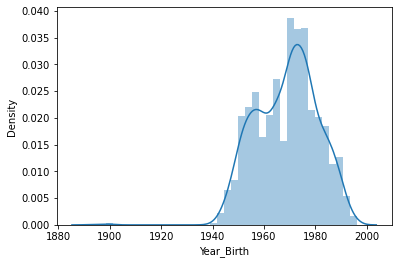

In [29]:
sns.distplot(df['Year_Birth'])

In [30]:
df=df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

In [31]:
sns.set_theme(style="white")
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})
rcParams['figure.figsize'] = 12,5

<Figure size 432x288 with 0 Axes>

<Figure size 864x360 with 0 Axes>

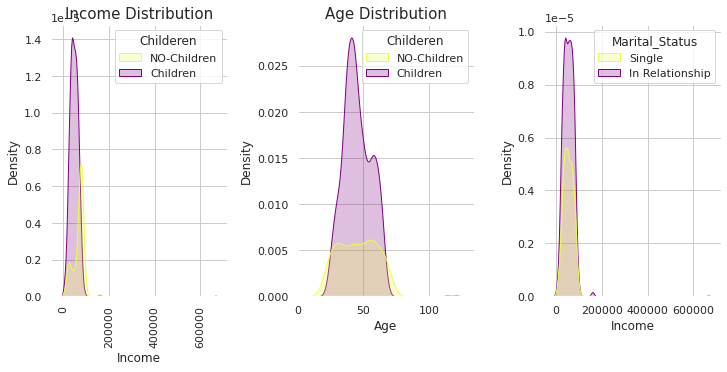

In [32]:
plt.subplots_adjust(wspace=0.4)
fig, axes = plt.subplots(1,3)
plt.subplots_adjust(wspace=0.4)
sns.kdeplot(df['Income'],hue=df['Childeren'],shade=True,ax=axes[0],palette=["#EBFF41", "#800080"])
sns.kdeplot(data=df,x="Age",hue="Childeren",shade=True,ax=axes[1],palette=["#EBFF41", "#800080"])
sns.kdeplot(data=df,x='Income',hue='Marital_Status',shade=True,ax=axes[2],palette=["#EBFF41", "#800080"])
axes[0].set_title('Income Distribution',fontsize=15)
axes[0].tick_params(axis='x', rotation=90)

axes[1].set_title('Age Distribution',fontsize=15)
fig.show()



In [33]:
df=df[df["Income"]<600000]
df=df[df["Age"]< 80]

<Figure size 864x360 with 0 Axes>

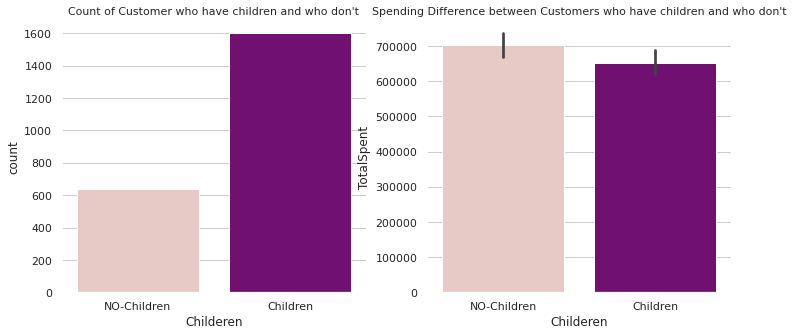

In [34]:
plt.subplots_adjust(wspace=0.7)
fig, axes = plt.subplots(ncols=2)
sns.countplot(df['Childeren'],ax=axes[0],palette=["#ECC5C0", "#800080"])
sns.barplot(df["Childeren"],df["TotalSpent"],estimator=sum,ax=axes[1],palette=["#ECC5C0", "#800080"])
axes[0].set_title("Count of Customer who have children and who don't",fontsize=11)
axes[1].set_title("Spending Difference between Customers who have children and who don't",fontsize=11)
fig.show()


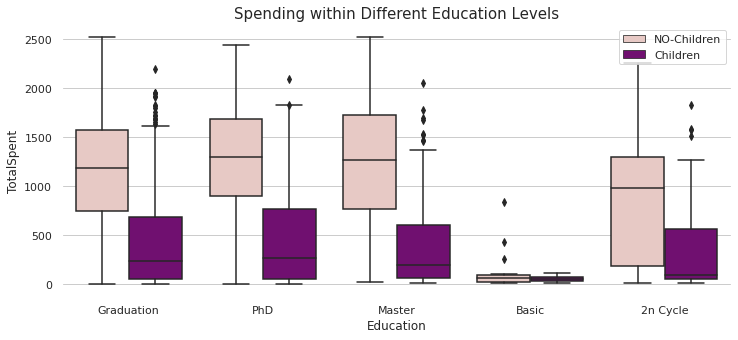

In [35]:
sns.boxplot(df["Education"],df["TotalSpent"],hue=df["Childeren"],palette=["#ECC5C0", "#800080"])
plt.legend(loc='upper right')
plt.title("Spending within Different Education Levels",fontsize=15)
fig.show()

In [36]:
plot_df = pd.DataFrame(df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()).reset_index()
plot_df.columns=["catagory","Spent_per_catagory"]
plot_df['catagory'] = plot_df['catagory'].str.replace('Mnt', '')

In [37]:
fig = px.pie(plot_df, values='Spent_per_catagory', names='catagory',color_discrete_sequence=px.colors.sequential.Purp)
fig.update_layout(
    autosize=False,
    width=600,
    height=300,
    
    
    template="simple_white",
    font_family='Courier New',
    paper_bgcolor="#FCFAFB",
    title_text = 'Sales by Caragory',title_x=0.5,

    showlegend=True)



fig.show()

In [38]:
df3=df[[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases' ]].sum().reset_index()

In [39]:
df3.columns=["purchases_way","pur_num"]

In [40]:
df3['purchases_way'] = df3['purchases_way'].map(lambda x: x.lstrip('Num') )

In [41]:
fig = px.pie(df3, values='pur_num', names='purchases_way',color_discrete_sequence=px.colors.sequential.Magenta)
fig.update_layout(
    autosize=False,
    width=600,
    height=300,
    
    template="simple_white",
    font_family='Courier New',
    paper_bgcolor="#FCFAFB",
    title_text = 'Ways of Purchases ',title_x=0.5,

    showlegend=True)



fig.show()

In [42]:
#df_enrollment=df.groupby(df['Dt_Customer'].dt.strftime('%Y-%m'))['ID'].count().reset_index()


Text(0.5, 1.0, 'The dynamic of customer enrollment')

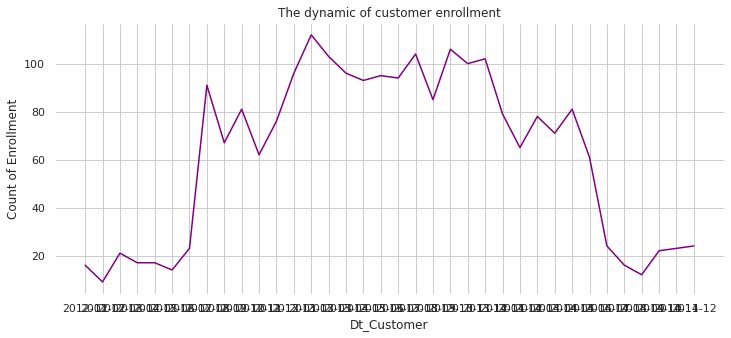

In [43]:
df_enrollment=df.groupby(df['Dt_Customer'].dt.strftime('%Y-%m'))['ID'].count().reset_index()
sns.lineplot(data=df_enrollment,x="Dt_Customer",y="ID",color="purple")
plt.ylabel("Count of Enrollment")
plt.title(label='The dynamic of customer enrollment')


In [44]:
df5=df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
df5=df5.replace({1:"Accept",0:"Didn't accept "})

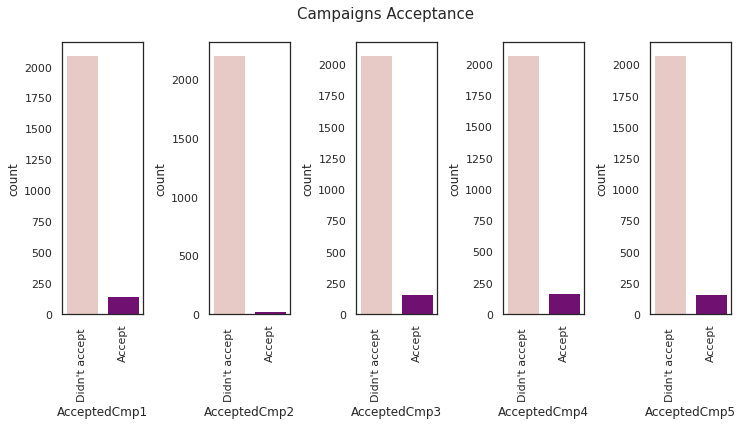

In [45]:
sns.set_theme(style="white")

fig, axs = plt.subplots(ncols=5)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.suptitle("Campaigns Acceptance",fontsize=15)
plt.subplots_adjust(wspace=0.8)
sns.countplot("AcceptedCmp1", data=df5, ax=axs[0], palette=["#ECC5C0", "#800080"])
sns.countplot("AcceptedCmp2", data=df5, ax=axs[1],palette=["#ECC5C0", "#800080"])
sns.countplot("AcceptedCmp3", data=df5, ax=axs[2],palette=["#ECC5C0", "#800080"])
sns.countplot("AcceptedCmp4", data=df5, ax=axs[3],palette=["#ECC5C0", "#800080"])
sns.countplot("AcceptedCmp5", data=df5, ax=axs[4],palette=["#ECC5C0", "#800080"])

fig.show()

In [46]:
col_to_drop=['ID', 'Year_Birth','Childeren','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2',
       'Childeren','Complain', 'Response',"Dt_Customer"]

In [47]:
df_new=df.drop(col_to_drop,axis=1)

In [48]:
df_new

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpent,TotalChildren,Total_cmp_acceptance,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,1617,0,0,57
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,27,2,0,60
2,Graduation,In Relationship,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,776,0,0,49
3,Graduation,In Relationship,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,53,1,0,30
4,PhD,In Relationship,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,422,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,In Relationship,61223.0,0,1,46,709,43,182,42,...,247,2,9,3,4,5,1341,1,0,47
2236,PhD,In Relationship,64014.0,2,1,56,406,0,30,0,...,8,7,8,2,5,7,444,3,1,68
2237,Graduation,Single,56981.0,0,0,91,908,48,217,32,...,24,1,2,3,13,6,1241,0,1,33
2238,Master,In Relationship,69245.0,0,1,8,428,30,214,80,...,61,2,6,5,10,3,843,1,0,58


In [49]:
df.shape

(2236, 32)

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.decomposition import PCA

In [56]:
cata_feature=["Education","Marital_Status"]
l_encoder=LabelEncoder()

for i in cata_feature:
    df_new[i]=df_new[[i]].apply(l_encoder.fit_transform)
    
    


In [57]:
scaler = StandardScaler()
scaler.fit(df_new)

StandardScaler()

In [59]:
df_scaled = pd.DataFrame(scaler.transform(df_new),columns= df_new.columns )

In [63]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA(n_components=3)

In [67]:
PCA_df = pd.DataFrame(pca.transform(df_scaled),columns=(["col1","col2", "col3"]))

In [ ]:
#
k_num = KElbowVisualizer(KMeans(), k=10)
k_num.fit(PCA_df)
k_num.show();

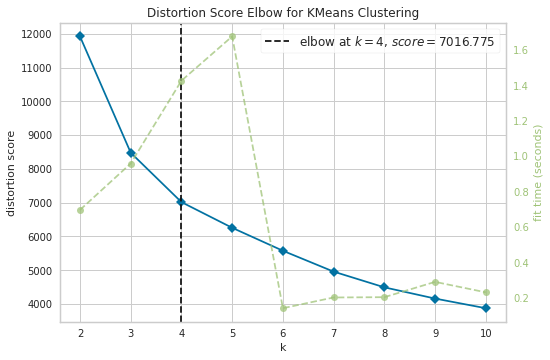

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
k_num = KElbowVisualizer(KMeans(),k=10)
k_num.fit(PCA_df)
k_num.show()

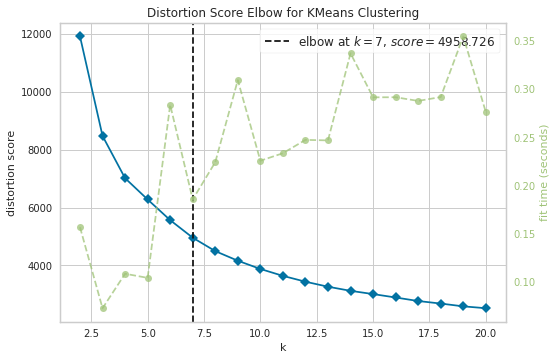

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
k_num = KElbowVisualizer(KMeans(),k=20)
k_num.fit(PCA_df)
k_num.show()

In [72]:
kmeans1=KMeans(n_clusters=4)
kmeans1.fit(PCA_df)
df_new['Clusters'] =kmeans1.labels_

<AxesSubplot:xlabel='TotalSpent', ylabel='Income'>

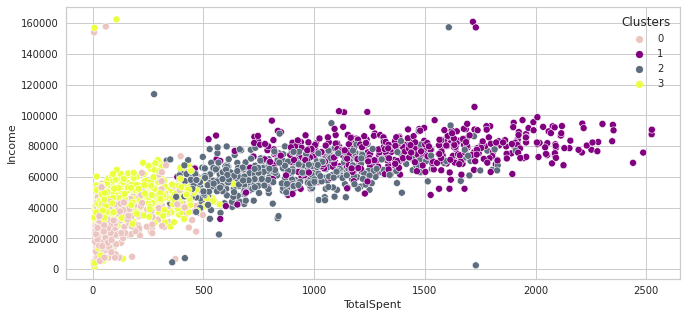

In [74]:
centers =pd.DataFrame(kmeans1.cluster_centers_)
centers.columns = ['x','y',"z"]
rcParams['figure.figsize'] = 11,5


sns.scatterplot(data=df_new, x ='TotalSpent',y="Income",hue='Clusters',palette=["#ECC5C0", "#800080","#5D6D7E","#EBFF41",])

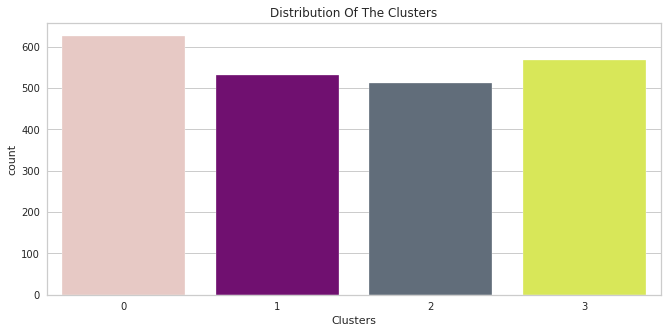

In [75]:
sns.countplot(x= df_new["Clusters"],palette=["#ECC5C0", "#800080","#5D6D7E","#EBFF41",])
plt.title("Distribution Of The Clusters")
plt.show()